In [7]:
from google.colab.patches import cv2_imshow # cv2.imshow("Red channel", r) does not work in colab



Red channel


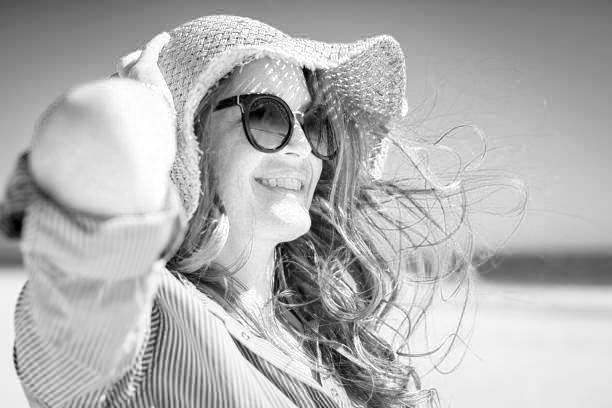

Green channel


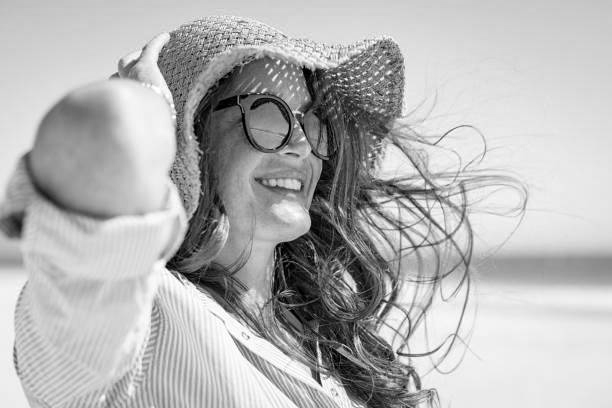

Blue channel


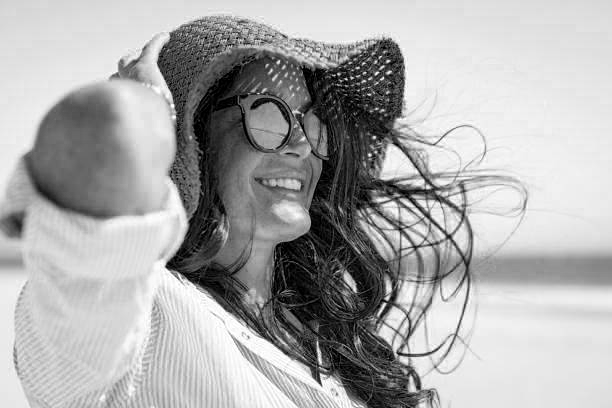

Hue (color tone)


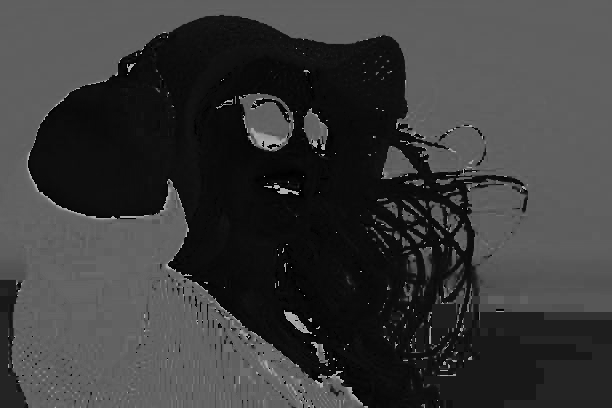

Saturation (color intensity)


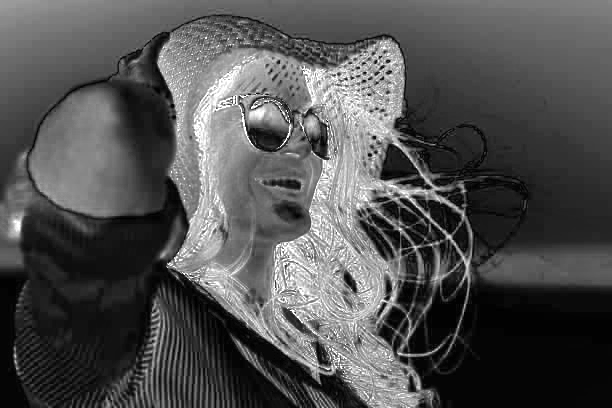

Value (brightness)


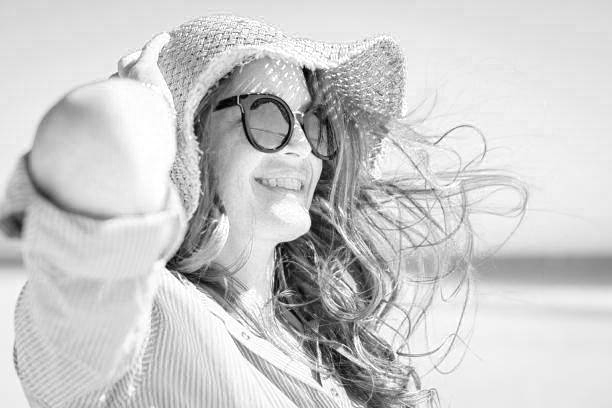

Modified Image


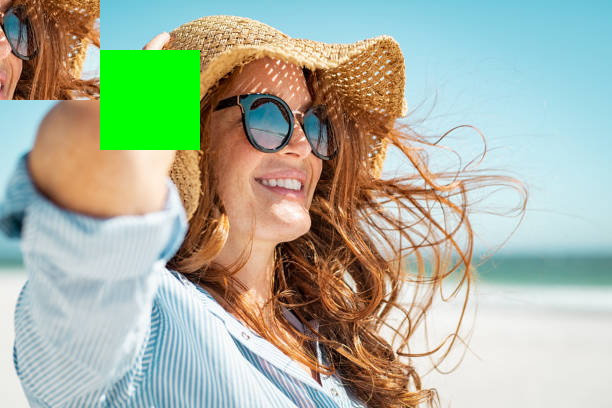

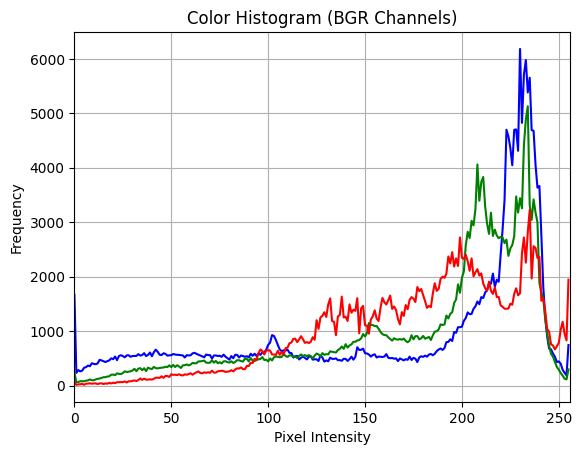

Brighter & Higher Contrast


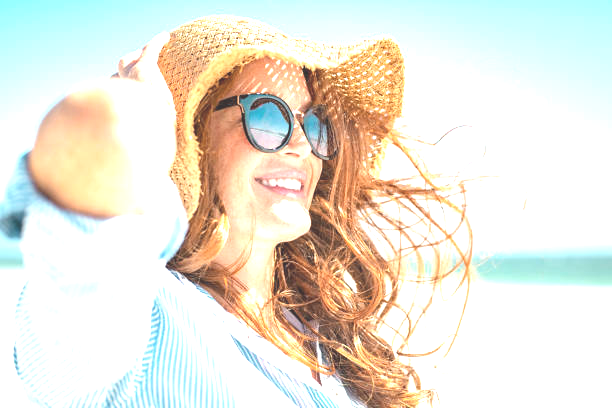

In [8]:
## TASK


# Cargar una imagen en color utilizando cv2.imread().
 # Acceder y mostrar los canales RGB y HSV por separado.
# Utilizar slicing de matrices para modificar regiones específicas de la imagen:

# Cambiar el color de un área rectangular.
# Sustituir una región por otra parte de la imagen.


# Calcular y visualizar el histograma de intensidades con cv2.calcHist() o matplotlib.pyplot.hist().
# Aplicar ajustes de brillo y contraste de forma manual (por ecuación) o con funciones de OpenCV (cv2.convertScaleAbs()).

# Bonus: Crear una función interactiva con sliders para modificar brillo y contraste en tiempo real usando cv2.createTrackbar().



#LINK TO THIS COLAB https://colab.research.google.com/drive/1qBCl9NB97p1rWTSoK2pm0S0NAUVekztj?authuser=0#scrollTo=N4uTWiol7rbK

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# loads an image utilizando cv2.imread().
img = cv2.imread('datos/fotoTaller5.jpg')
if img is None:
    raise FileNotFoundError("Image not found. Make sure the path is correct.")

# Convert BGR to RGB to properly display with matplotlib or OpenCV if needed
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Split and show the RGB channels separately
# This helps us understand how each color contributes to the final image
r, g, b = cv2.split(img_rgb)
print("Red channel")
cv2_imshow(r)

print("Green channel")
cv2_imshow(g)

print("Blue channel")
cv2_imshow(b)

# Convert to HSV and split the channels to analyze brightness and color info
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)
print("Hue (color tone)")
cv2_imshow(h)

print("Saturation (color intensity)")
cv2_imshow(s)

print("Value (brightness)")
cv2_imshow(v)

# here i make a copy so we don't alter the original image
mod_img = img.copy()

# Change the color of a specific rectangular area
mod_img[50:150, 100:200] = [0, 255, 0]  # OpenCV uses BGR, so this is bright green

# here we replace one part of the image with another — like a simple 'copy-paste'
x, y, w, h = 300, 100, 100, 100
region = img[y:y+h, x:x+w]
mod_img[0:h, 0:w] = region

print("Modified Image")
cv2_imshow(mod_img)

# Now we visualize the color intensity distribution (histogram) for each BGR channel
colors = ('b', 'g', 'r')  # OpenCV's default channel order
plt.figure()
for i, color in enumerate(colors):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
plt.title("Color Histogram (BGR Channels)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Brightness and contrast adjustment using a formula
# alpha affects contrast, beta affects brightness
alpha = 1.2  # contrast factor (>1 makes it more intense)
beta = 50    # brightness offset (positive makes it brighter)
bright_contrast = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
print("Brighter & Higher Contrast")
cv2_imshow(bright_contrast)


